Import libraries that will be needed in this exercise
Import DAWN dataset with Pandas as a dataframe

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv (r"C:\Users\Laura-Black\Documents\PhD\Data Scientist\Springboard\Capstone Projects\Drug Abuse ED Visits\DAWN-2011-DS0001-data-excel.csv", 
                     index_col=0, dtype={"Buyer_Part_Number": str}, low_memory=False)

print(df.head())
print(df.head())


        METRO  STRATA  PSU  REPLICATE   CASEWGT  PSUFRAME  AGECAT  SEX  RACE  \
CASEID                                                                         
1           2      25  108          2  0.942635         3       4    1     2   
2           2      29  129          2  5.992011         9      11    1     3   
3           7       7   25          1  4.723172         6      11    2     2   
4          10       8   29          2  4.080147         6       2    1     3   
5           1      22   94          2  5.177709        10       6    1     3   

        YEAR  ...  sdled_4_22  sdled_5_22  sdled_6_22  CASETYPE  DISPOSITION  \
CASEID        ...                                                              
1       2011  ...        -7.0        -7.0          -7         8            6   
2       2011  ...        -7.0        -7.0          -7         4            7   
3       2011  ...        -7.0        -7.0          -7         4            1   
4       2011  ...        -7.0        -7

Look at dataframe to see its size and column names

In [5]:
print(df.info())
print(list(df.columns.values))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229211 entries, 1 to 229211
Columns: 284 entries, METRO to ALLABUSE
dtypes: float64(100), int64(184)
memory usage: 498.4 MB
None
['METRO', 'STRATA', 'PSU', 'REPLICATE', 'CASEWGT', 'PSUFRAME', 'AGECAT', 'SEX', 'RACE', 'YEAR', 'QUARTER', 'DAYPART', 'NUMSUBS', 'DRUGID_1', 'CATID_1_1', 'CATID_2_1', 'CATID_3_1', 'ROUTE_1', 'TOXTEST_1', 'sdled_1_1', 'sdled_2_1', 'sdled_3_1', 'sdled_4_1', 'sdled_5_1', 'sdled_6_1', 'DRUGID_2', 'CATID_1_2', 'CATID_2_2', 'CATID_3_2', 'ROUTE_2', 'TOXTEST_2', 'sdled_1_2', 'sdled_2_2', 'sdled_3_2', 'sdled_4_2', 'sdled_5_2', 'sdled_6_2', 'DRUGID_3', 'CATID_1_3', 'CATID_2_3', 'CATID_3_3', 'ROUTE_3', 'TOXTEST_3', 'sdled_1_3', 'sdled_2_3', 'sdled_3_3', 'sdled_4_3', 'sdled_5_3', 'sdled_6_3', 'DRUGID_4', 'CATID_1_4', 'CATID_2_4', 'CATID_3_4', 'ROUTE_4', 'TOXTEST_4', 'sdled_1_4', 'sdled_2_4', 'sdled_3_4', 'sdled_4_4', 'sdled_5_4', 'sdled_6_4', 'DRUGID_5', 'CATID_1_5', 'CATID_2_5', 'CATID_3_5', 'ROUTE_5', 'TOXTEST_5', 'sdle

The dataframe is very large and somewhat unwieldy the decision was made to remove the 'sdled' and 'CATID' columns. These columns won't be used in the analysis because their inclusion is beyond the scope of this project.

In [6]:
for col in df.columns:
    if 'sdled' in col:
        del df[col]
        
for col in df.columns:
    if 'CATID' in col:
        del df[col]
        
print(df.info())
print(list(df.columns.values))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229211 entries, 1 to 229211
Data columns (total 86 columns):
METRO           229211 non-null int64
STRATA          229211 non-null int64
PSU             229211 non-null int64
REPLICATE       229211 non-null int64
CASEWGT         229211 non-null float64
PSUFRAME        229211 non-null int64
AGECAT          229211 non-null int64
SEX             229211 non-null int64
RACE            229211 non-null int64
YEAR            229211 non-null int64
QUARTER         229211 non-null int64
DAYPART         229211 non-null int64
NUMSUBS         229211 non-null int64
DRUGID_1        229211 non-null int64
ROUTE_1         229211 non-null int64
TOXTEST_1       229211 non-null int64
DRUGID_2        229211 non-null int64
ROUTE_2         229211 non-null int64
TOXTEST_2       229211 non-null int64
DRUGID_3        229211 non-null int64
ROUTE_3         229211 non-null int64
TOXTEST_3       229211 non-null int64
DRUGID_4        229211 non-null int64
ROUTE_4      

Get summary data for all columns.

In [7]:
df.describe()

,METRO,STRATA,PSU,REPLICATE,CASEWGT,PSUFRAME,AGECAT,SEX,RACE,YEAR,...,DRUGID_22,ROUTE_22,TOXTEST_22,CASETYPE,DISPOSITION,ALCOHOL,NONALCILL,PHARMA,NONMEDPHARMA,ALLABUSE
count,229211.000000,229211.000000,229211.000000,229211.000000,229211.000000,229211.000000,229211.000000,229211.000000,229211.000000,229211.0,...,229211.000000,229211.000000,229211.000000,229211.000000,229211.000000,229211.00000,229211.000000,229211.000000,229211.000000,229211.000000
mean,6.670090,24.681551,109.610839,1.500028,22.107901,73.348304,7.352370,1.477289,0.278656,2011.0,...,-6.977012,-6.999808,-7.000052,5.377774,4.103743,0.19739,0.344613,0.687716,0.226477,0.574571
std,4.719905,13.331152,64.444097,0.500001,68.403862,211.852785,2.691575,0.526280,3.463027,0.0,...,5.912475,0.044111,0.010233,2.255081,10.315115,0.39803,0.475243,0.463426,0.418552,0.494409
min,1.000000,1.000000,1.000000,1.000000,0.938440,2.000000,-8.000000,-8.000000,-8.000000,2011.0,...,-7.000000,-9.000000,-9.000000,1.000000,-8.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,13.000000,53.000000,1.000000,2.714999,8.000000,5.000000,1.000000,1.000000,2011.0,...,-7.000000,-7.000000,-7.000000,4.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,25.000000,109.000000,2.000000,4.190787,10.000000,8.000000,1.000000,1.000000,2011.0,...,-7.000000,-7.000000,-7.000000,4.000000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000
75%,12.000000,35.000000,165.000000,2.000000,7.148615,17.000000,9.000000,2.000000,2.000000,2011.0,...,-7.000000,-7.000000,-7.000000,8.000000,7.000000,0.00000,1.000000,1.000000,0.000000,1.000000
max,14.000000,51.000000,233.000000,2.000000,862.824350,1215.000000,11.000000,2.000000,4.000000,2011.0,...,1878.000000,6.000000,-7.000000,8.000000,96.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Count the number of distinct values per column 

           Count
CASEWGT     2931
DRUGID_1    1604
DRUGID_2    1074
DRUGID_3     787
DRUGID_4     634
...          ...
REPLICATE      2
NONALCILL      2
PHARMA         2
ALLABUSE       2
YEAR           1

[86 rows x 1 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85]), <a list of 86 Text xticklabel objects>)

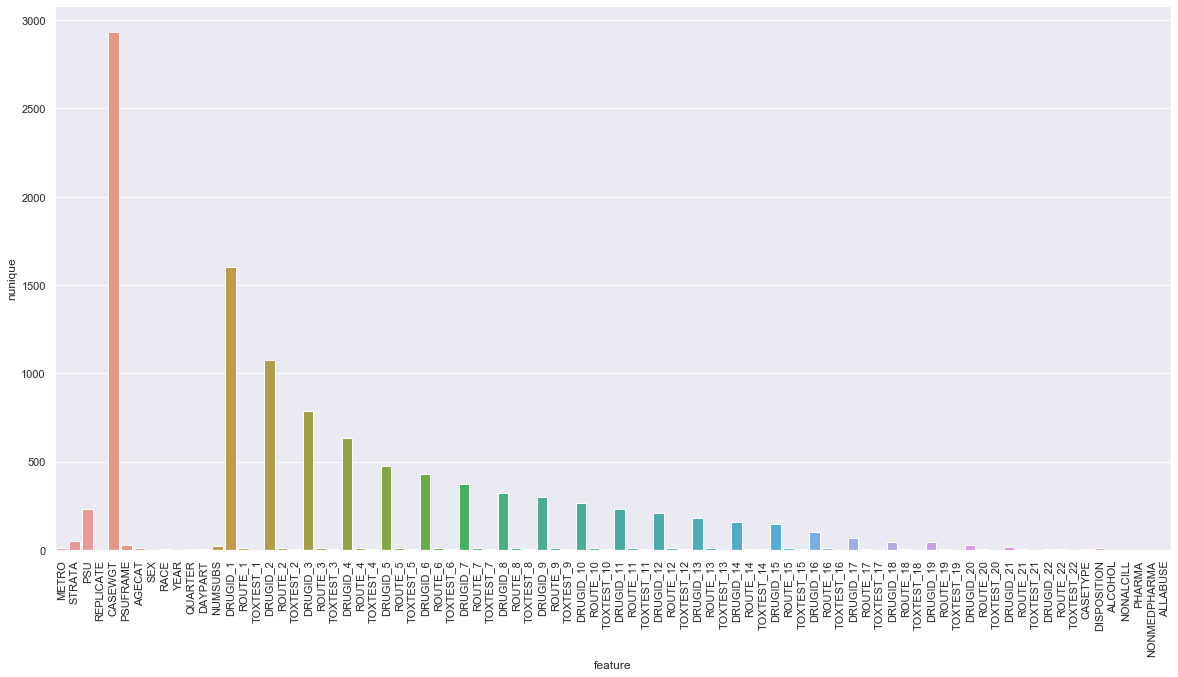

In [9]:
res = df.nunique()\
        .sort_values(ascending=False)\
        .rename('Count')\
        .to_frame()
print(res)

    
nu = df.nunique().reset_index()
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu)
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(rotation=90)

Many of the variables in the dataframe are categorical, but are represented by numbers. In order to tell the data story better, it was decided to replace the numbers with the corresponding label. This replacement was done for all the variables except the drug names because there are > 2600 drug names in the data glossary that was available with the dataset. Also, though there exists a shorter, cleaner way to perform the replacements than to do them one by one, due to time constraints, it was decided to use the method that is working rather than spend more time researching a more 'pythonic' method.

In [10]:
df["METRO"].replace({1: "Boston", 2: "New York", 3: 'Chicago', 4:'Detroit', 5:'Minneapolis',6:'Fort Lauderdale',
                    7:'Date County', 8:'Houston', 9:'Denver', 10:'Phoenix', 11:'Oakland', 12:'San Francisco',
                    13:'Seattle', 14:'All Other'}, inplace=True)

df["AGECAT"].replace({1:'< 5', 2:'6-11', 3:'12-17', 4:'18-20', 5:'21-24', 6:'25-29', 7:'30-34', 8:'35-44', 9:'45-54', 
                     10:'55-64', 11:'> 65', -8: 'Not Doc'}, inplace=True)
df['SEX'].replace({1:'Male', 2:'Female', -8: 'Not Doc'}, inplace=True)
df['RACE'].replace({1:'White', 2:'Black', 3:'Hispanic', 4:'All Other', -8:'Not Doc'}, inplace=True)
df['DAYPART'].replace({1:'12-5:59 AM', 2:'6-11:59 AM', 3:'12-5:59 PM', 4:'6-11:59 PM'}, inplace=True)
df['ROUTE_1'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc'}, inplace=True)
df['TOXTEST_1'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing'}, inplace=True)
df['ROUTE_2'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_2'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)
df['ROUTE_3'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_3'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                     
df['ROUTE_4'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_4'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)  
df['ROUTE_5'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_5'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_6'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_6'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)  
df['ROUTE_7'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_7'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_8'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_8'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_9'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_9'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_10'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_10'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                      
df['ROUTE_11'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_11'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_12'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_12'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_13'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_13'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_14'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_14'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)   
df['ROUTE_15'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_15'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_16'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_16'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_17'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_17'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_18'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_18'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_19'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_19'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                      
df['ROUTE_20'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_20'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_21'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_21'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                       
df['ROUTE_22'].replace({1:'Oral', 2:'Injected', 3:'Inhaled, Sniffed, Snorted', 4:'Smoked', 5:'Other', 6:'Transdermal',
                     98:'Multiple Routes', -9:'Missing', -8:'Not Doc', -7:'N/A'}, inplace=True)                    
df['TOXTEST_22'].replace({1:'Confirmed', 2:'Not Confirmed', -9:'Missing', -7:'N/A'}, inplace=True)                      
df['CASETYPE'].replace({1:'Suicide Attempt', 2:'Seeking Detox', 3:'Alcohol (Age<21)', 4:'Adverse Reaction',
                      5:'Overmedication', 6:'Malicious Poisoning', 7:'Accidential Ingestion', 8:'Other'}, inplace=True)                 
df['DISPOSITION'].replace({1:'D/C Home', 2:'Police/Jail', 3:'Detox/Treat Referral', 4:'ICU', 5:'Surgery', 
                          6:'Detox, Psych Unit', 7:'Other Inpatient', 8:'Transferred'}, inplace=True)
df['ALCOHOL'].replace({0:'No', 1:'Yes'}, inplace=True)
df['NONALCILL'].replace({0:'No Illicit Drugs', 1:'Illicit Drugs'}, inplace=True)
df['PHARMA'].replace({0:'No Pharmaceuticals', 1:'Pharmaceuticals'}, inplace=True)                     
df['NONMEDPHARMA'].replace({0:'No Non-Medical Pharma', 1:'Non_Medical Pharma'}, inplace=True)                     
df['ALLABUSE'].replace({0:'Not All Misuse & Abuse Episode', 1:'All Misuse & Abuse Episode'}, inplace=True)                     
                                          
                    
print(df.head())

              METRO  STRATA  PSU  REPLICATE   CASEWGT  PSUFRAME AGECAT  \
CASEID                                                                   
1          New York      25  108          2  0.942635         3  18-20   
2          New York      29  129          2  5.992011         9   > 65   
3       Date County       7   25          1  4.723172         6   > 65   
4           Phoenix       8   29          2  4.080147         6   6-11   
5            Boston      22   94          2  5.177709        10  25-29   

           SEX      RACE  YEAR  ...  DRUGID_22 ROUTE_22  TOXTEST_22  \
CASEID                          ...                                   
1         Male     Black  2011  ...         -7      N/A         N/A   
2         Male  Hispanic  2011  ...         -7      N/A         N/A   
3       Female     Black  2011  ...         -7      N/A         N/A   
4         Male  Hispanic  2011  ...         -7      N/A         N/A   
5         Male  Hispanic  2011  ...         -7      N/A

Find the number of unique values in each column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B0A005F48>,
      dtype=object)

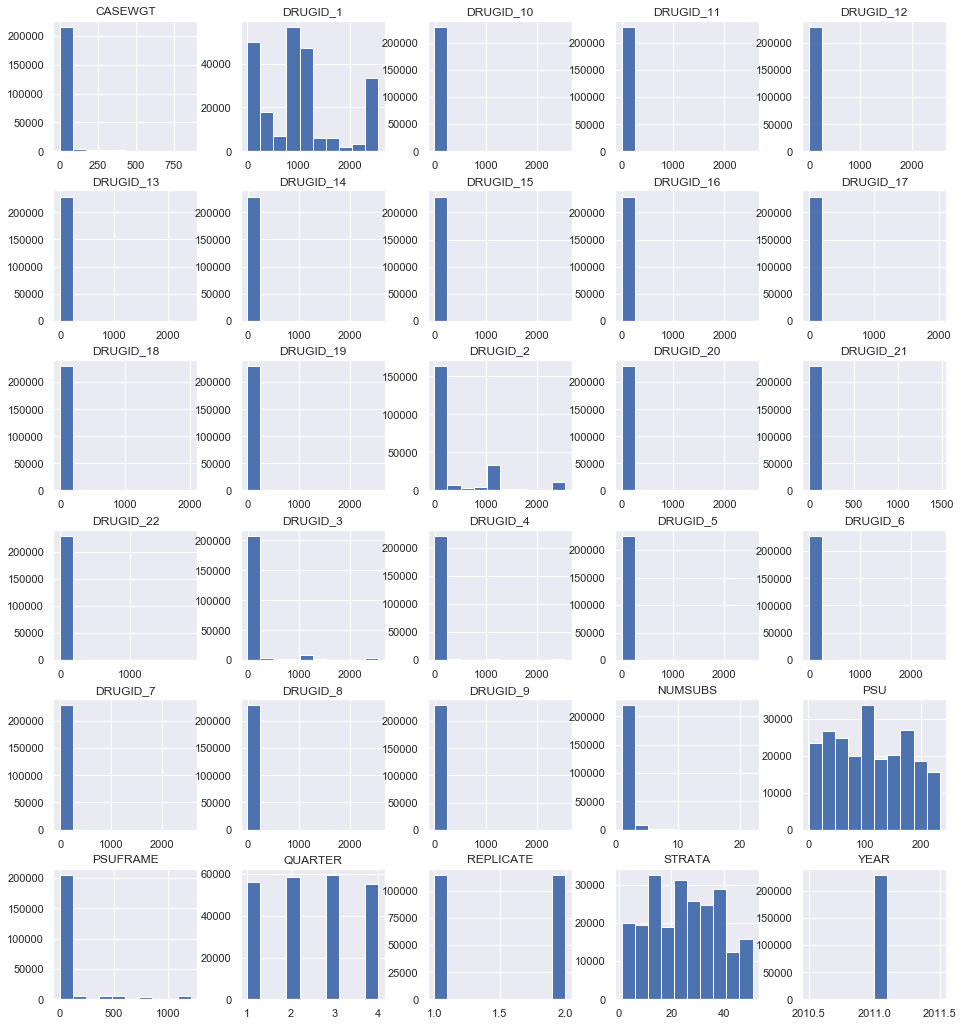

In [11]:
df.hist(figsize = (16,18))

Check for missing values

In [12]:
# Any missing values?
print (df.isnull().values.any())
print('\n')

# Total missing values for each feature
print (df.isnull().sum())
print('\n')

# Total number of missing values
print (df.isnull().sum().sum())

False


METRO           0
STRATA          0
PSU             0
REPLICATE       0
CASEWGT         0
               ..
ALCOHOL         0
NONALCILL       0
PHARMA          0
NONMEDPHARMA    0
ALLABUSE        0
Length: 86, dtype: int64


0


In [13]:
df.to_csv(r"C:\Users\Laura-Black\Documents\PhD\Data Scientist\Springboard\Capstone Projects\Drug Abuse ED Visits\Output files\Capstone1DataWrangling.csv")